# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="blue">легкая часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [1864]:
# Bot check

# HW_ID: fpmi_ad3_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1865]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [1866]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 146d04157c07b08ee58d3eafdcf82c32 -->
Рассмотрим модель одномерной линейной регрессии *без свободного параметра* $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Опишите, что произойдет, если для некоторого $i$ ошибка $\varepsilon_i$ будет очень большой.


*Замечания.*
1. Это теоретическая задача, не перепутайте 😄
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитайте требования к формату решения в правилах сдачи задания.**

**Решение:**

1. $\hat{\theta} = (X^TX)^{-1}X^TY$. По условию $X = (x_1\; x_2\; ...\; x_n)^T$ $Y$, понятное дело, $Y = (Y_1\; Y_2\; ...\; Y_n)^T$. $X^TX = x_1^2+...+x_n^2$, $X^TY = x_1Y_1+...+x_nY_n$ Тогда, подставив в формулу, получим: $$\hat{\theta} = \frac{x_1Y_1+...+x_nY_n}{x_1^2+...+x_n^2}$$
2. Формула для градиентного спуска: $$\theta_{t+1} = \theta_{t} - \eta X^T(X\theta_{t}-Y)=\theta_{t}-\eta \sum_{i=1}^{n}x_i(x^T_i\theta_{t}-Y_i)$$
   Формула для стохастического градиентого спуска: $$\theta_{t+1} = \theta_{t} - \eta X^T_{I}(X_{I}\theta_{t}-Y_{I}) = \theta_{t} - \eta \sum_{i=1}^{k}x_{i}(x^T_{i}\theta_{t} - Y_{i})$$ 
   Откуда мы берем матрицы $X_I$ и $Y_I$? На каждой итерации выбираем произвольные k строк из датасета (равномерное распределение) и $X_{I}$ это матрица со значениями их признаков, а $Y_{I}$ вектор-столбец их таргетов. $x^T_i$ строчка матрицы $X_I$, а $y_i$ - столбец $Y_I$. (То есть каждую итерацию разные наборы строчек). Делается это для уменьшения вычислительной сложности
3. МНК минимизирует сумму квадратов ошибок, если для некоторого $i$ ошибка будет слишком большой, ее вклад будет значительно больше, чем у других точек. Тогда итоговая модель будет неоптимальна. Это хорошо видно на практике: на лабораторных по физике некоторые точки могут сильно выбиваться и из-за них итоговая модель в виде прямой проводится неоптимально. В таких случаях советуют эти точки выкидывать

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 2.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуком по линейной регрессии</a> с занятия.*

Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [1867]:
bike_sharing = pd.read_csv('day.csv')

bike_sharing = bike_sharing[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

train, test = train_test_split(bike_sharing, train_size=0.8, test_size=0.2, random_state=42)

Выше мы оставили только интересующие нас признаки, а затем разделили обучающую и тестовую части в необходимом соотношении

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

Категориальные признаки: `season`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`

Вещественные признаки: `temp`, `atemp`, `hum`, `windspeed`

In [1868]:
categorial_features = ['season', 'holiday', 'weekday', 'workingday', 'mnth', 'weathersit']

real_features = ['temp', 'atemp', 'hum', 'windspeed']

target = 'cnt'

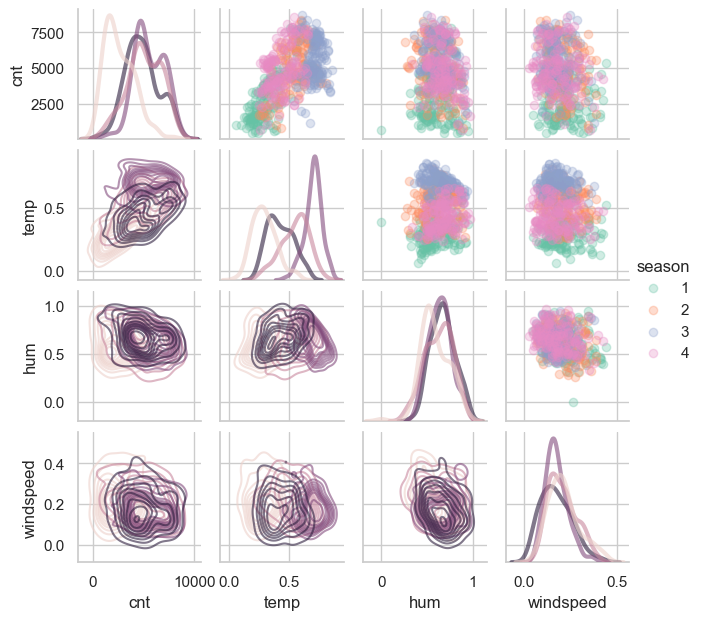

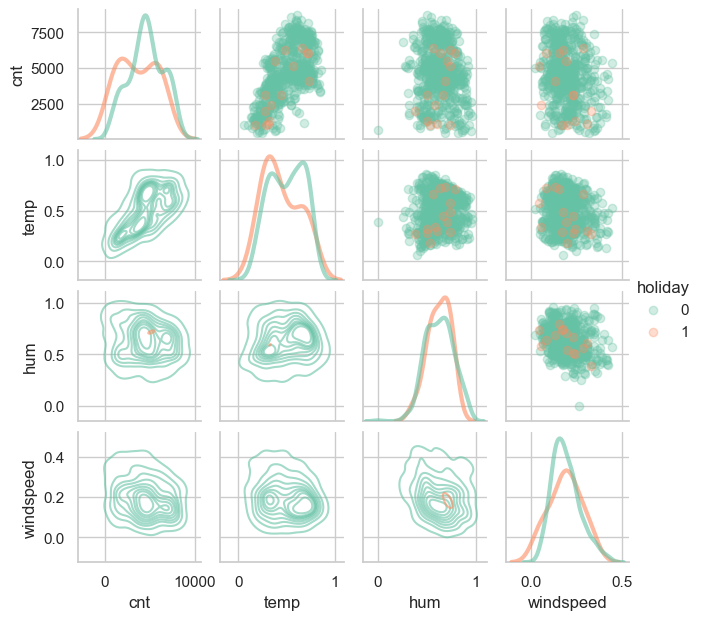

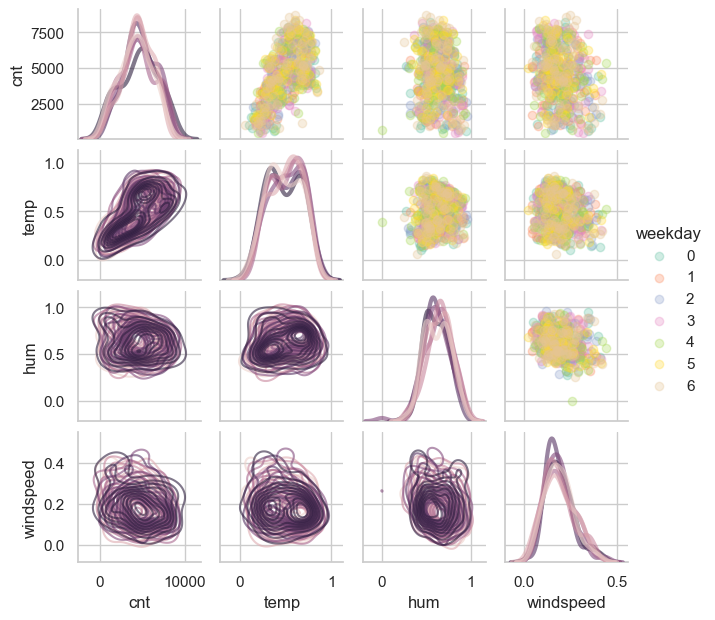

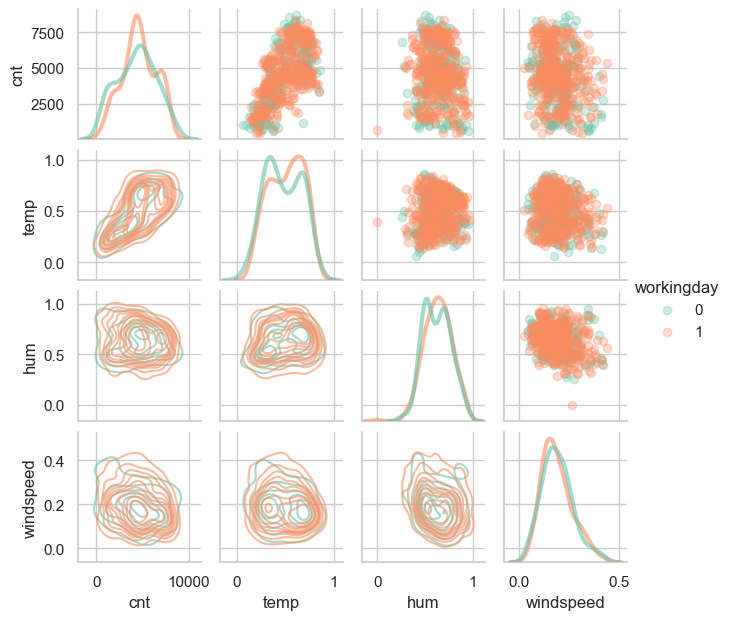

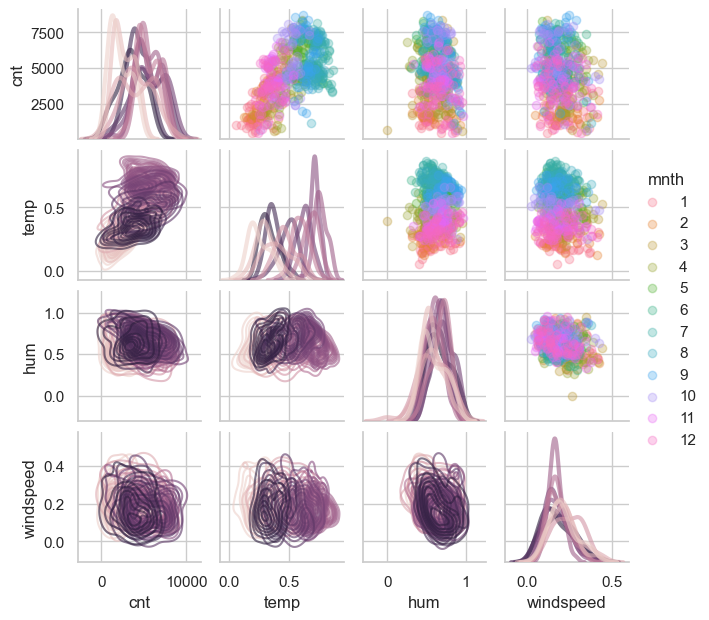

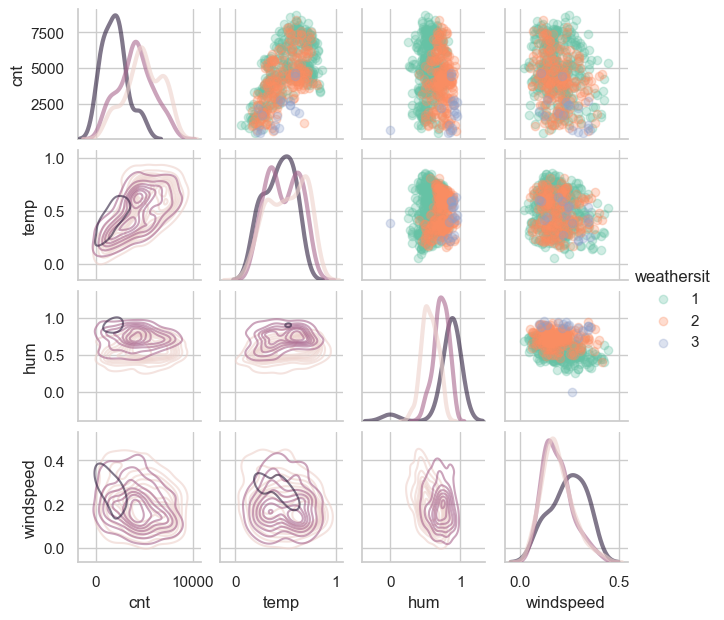

In [1869]:
for hue in categorial_features:
    pair_grid = sns.PairGrid(train[['cnt', 'temp', 'hum', 'windspeed', hue]], hue=hue, diag_sharey=False, height=3)

    pair_grid.fig.set_size_inches(6, 6)
    pair_grid.map_lower(sns.kdeplot, alpha=0.6)
    pair_grid.map_upper(plt.scatter, alpha=0.3)
    pair_grid.map_diag(
        sns.kdeplot, lw=3, alpha=0.6, common_norm=False
    )  # каждая плотность по отдельности должна давать 1 при интегрировании

    pair_grid.add_legend()


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** 
1. Нет, в основном точки находятся в одной области на всех графиках scatterplot.
2. Нет, не стоит. На всех графиках `scatterplot` видно, что зависимостей, описанных выше, там нет. Больше всего `cnt` зависит от `atemp` и там хорошо видно, что зависимость скорее линейная, чем одна из тех, что описаны выше

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">пример</a> с занятия). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Уберем признак `temp`, так как на предыдущих графиках видно, что его значения почти ничем не отличаются от значения `atemp`. Также уберем признаки `workingday`, `season`, ведь они зависят от других признаков: `weekday`, `month` соответственно.

**б).** Закодируем категориальные признаки.

**в).** Я построил гистограммы в зависимости от `real_features` и не увидел там особо никаких выбросов, поэтому и решил, что эти данные не требуют этого

Реализуйте данную процедуру.

In [1870]:
categotial_features = ['season', 'holiday', 'weekday', 'workingday', 'mnth', 'weathersit']

real_features = ['atemp', 'hum', 'windspeed']

In [1871]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

train_cat = encoder.fit_transform(train[categorial_features])
test_cat = encoder.transform(test[categorial_features])

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [1872]:
x_train = np.hstack([train[real_features], train_cat])
x_test = np.hstack([test[real_features], test_cat])

model_full = LinearRegression()
model_full.fit(x_train, train[target])

LinearRegression()

Значения коэффициентов:

In [1873]:
print('Значение коэффициентов:', model_full.coef_ )

print('Значение свободного коэффициента:', model_full.intercept_)

Значение коэффициентов: [ 7060.20168122 -2984.28216418 -2548.79304663   942.91517215
   731.5719243   1567.77417044  -273.65690952    17.4843381
   -39.55544919   -10.57785908   -74.28857594   153.32615269
   491.43012804   320.04551609    68.82211419   494.06297829
  -116.03376808   200.3499272   -247.65239873  -843.8670044
  -308.59069047   637.97610487   259.84815311  -276.24556097
   -83.00601942  -269.00117512 -1814.26886891]
Значение свободного коэффициента: 2621.6025536836974


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

Предсказания для тестовой выборки:

In [1874]:
predictions = model_full.predict(x_test)

In [1875]:
print('RMSE:', metrics.mean_squared_error(test[target], predictions) ** 0.5)
print('MAE:', metrics.mean_absolute_error(test[target], predictions))
print('MAPE:', 100 * ((np.abs(test[target] - predictions) / test[target]).mean()))

RMSE: 1356.0911194183923
MAE: 1183.2755843451093
MAPE: 112.87250666899338


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 82920a034ed2865f8a7e2f03eaabceb6 -->
Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками. Причем, возможно, вы уже могли решить эту проблему на предыдущих этапах. В таком случае посмотрите, что будет, если "вернуть" проблему.

Понятно, что часть изначальных признаков линейнозависима. Например, `weekday` и `workingday`. Из-за чего матрица признаков $X^TX$ становится вырожденной и МНК нельзя применить, ведь формула коэффициентов выводится с предположением о невырожденности этой матрицы

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 56aff27d604dbe90dda7b28a8da4e2e9 -->
Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Я уже выше исправил эту проблему. Поэтому я сейчас верну эти признаки и посмотрю, что произойдет с коэффициентами

Подготавливаем данные:

In [1876]:
categorial_features = ['season', 'holiday', 'weekday', 'workingday', 'mnth', 'weathersit']

real_features = ['temp', 'atemp', 'hum', 'windspeed']

encoder = OneHotEncoder(drop='first', sparse_output=False)

train_cat = encoder.fit_transform(train[categorial_features])
test_cat = encoder.transform(test[categorial_features])

x_train = np.hstack([train[real_features], train_cat])
x_test = np.hstack([test[real_features], test_cat])

Посчитаем значение коэффициентов по формуле $\hat{\theta} = (X^TX)^{-1}X^TY$:

In [1877]:
X = x_train
Y = train[target].values.reshape(-1, 1)

X = np.hstack([np.ones((X.shape[0], 1)), X]) ## добавляем столбец из единичек
x_test = np.hstack([np.ones((x_test.shape[0], 1)), x_test])

theta = np.linalg.inv(X.T @ X) @ X.T @ Y

predictions = (x_test @ theta).flatten()

Посчитаем значение различных метрик для нашего прогноза:

In [1878]:
print('RMSE:', metrics.mean_squared_error(test[target], predictions) ** 0.5)
print('MAE:', metrics.mean_absolute_error(test[target], predictions))
print('MAPE:', 100 * ((np.abs(test[target] - predictions) / test[target]).mean()))

RMSE: 4436.725912492529
MAE: 3934.0883250945158
MAPE: 224.69930995624895


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы.

**Выводы:**

1. Модель с грамотно обработанными данными имеет метрику качества $MAPE = 112.9\%$, что говорит о среднем значении ошибки в процентах. Для получения этого результата мы предварительно убрали все линейнозависимые признаки, а также закодировали категориальные признаки.
2. Модель, в которой мы не убирали линейнозависимые признаки имеет метрику качества $MAPE = 224.7\%$. Это значит, что в среднем абсолютное отклонение от реального значения больше $200\%$. Понятно, что это плохой результат, учитывая, что выше мы получили модель cо значением этой метрики в 2 раза меньше.
3. Из проделанной работы можно сделать выводы, что наличие бОльшего количества признаков не всегда дает лучший результат, а напротив, может дать результат намного хуже ожидаемого. Поэтому стоит грамотно подходить к условию, что $X^TX$ должно быть невырожденной.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2c0205cf5ab3ec02c6ea667faa01e48b -->
---
### Задача 3.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_logreg_sklearn">ноутбуком по логистической регрессии</a> с занятия.*

> Одно из интересных свойств модели логистической регрессии — *при соблюдении её предположений* она дает возможность получать **несмещенные оценки вероятностей** принадлежности объекта к определенному классу.  
> Для пояснения рассмотрим объект $x$ и соответствующее предсказание вероятности $\widehat{p}(x)$ для класса 1. Если взять небольшую окрестность объекта $x$, то доля объектов класса 1 в этой окрестности будет приблизительно равна $\widehat{p}(x)$.  

Далее проверим это свойство на конкретных примерах.

С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

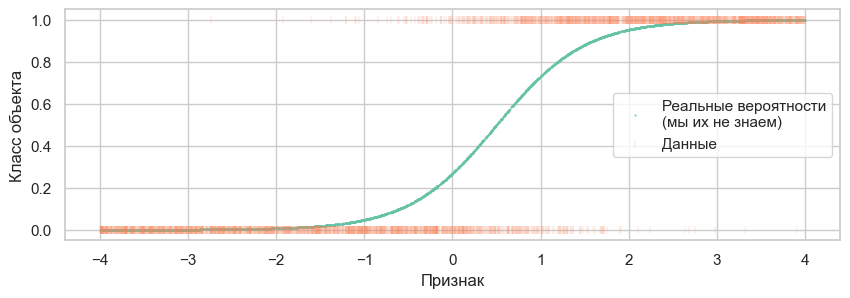

In [1879]:
sample_size = 3000  # Размер выборки

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

Обучите логистическую регрессию, используя реализацию из `sklearn`, при этом свободный коэффициент должен присутствовать в модели. Укажите также `penalty='none'`.

In [1880]:
model = LogisticRegression(penalty=None)
model.fit(X, y)

LogisticRegression(penalty=None)

Напечатайте оценку коэффициентов

In [1881]:
print('коэффициент:', model.coef_)
print('свободный коэффициент:', model.intercept_)

коэффициент: [[2.10421443]]
свободный коэффициент: [-1.17945003]


Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

Получим предсказания:

In [1882]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))

predict = model.predict(X_grid)
predict_train = model.predict(X)

predict_prob = model.predict_proba(X_grid)
predict_prob_train = model.predict_proba(X)

Построим графики:

Text(0, 0.5, 'Класс объекта')

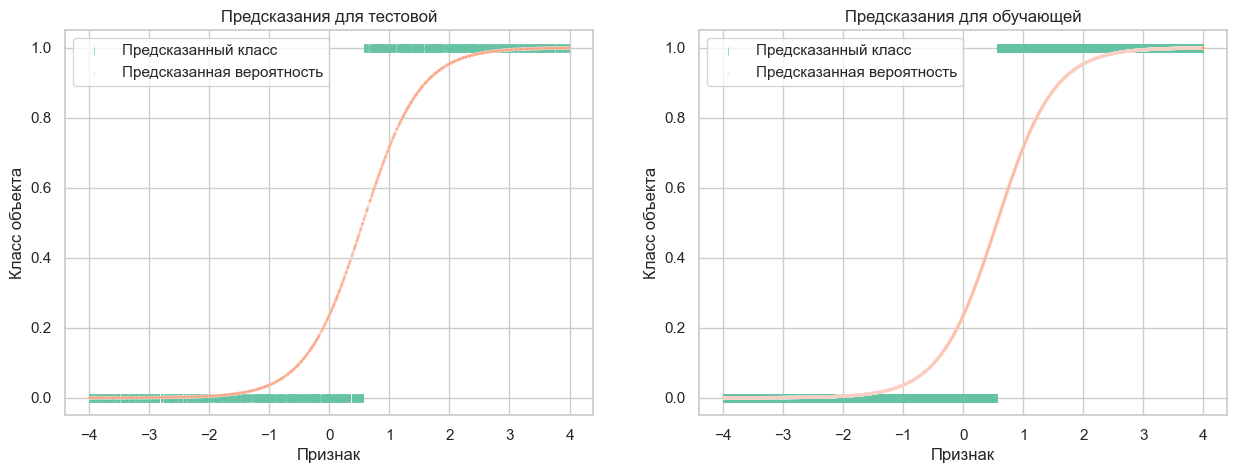

In [1883]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(ax=axes[1], x=X_grid.flatten(), y=predict, marker='|')
sns.scatterplot(ax=axes[1], x=X_grid.flatten(), y=predict_prob[:, 1], size=1, marker='.', alpha=0.2)

sns.scatterplot(ax=axes[0], x=X.flatten(), y=predict_train, marker='|')
sns.scatterplot(ax=axes[0], x=X.flatten(), y=predict_prob_train[:, 1], size=1, marker='.', alpha=0.2)

axes[1].set_title('Предсказания для обучающей')
axes[0].set_title('Предсказания для тестовой')

axes[1].legend(['Предсказанный класс', 'Предсказанная вероятность'])
axes[0].legend(['Предсказанный класс', 'Предсказанная вероятность'])

axes[0].set_xlabel('Признак')
axes[0].set_ylabel('Класс объекта')

axes[1].set_xlabel('Признак')
axes[1].set_ylabel('Класс объекта')


Разбейте отрезок $[-4, 4]$ на одинаковые бины длины длины 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

Подготовим данные:

In [1884]:
bins = np.arange(-4, 4.0, 0.2)
indices = np.digitize(X, bins)

table_x = pd.DataFrame({'indices' : indices.flatten(), 'values' : X.flatten(), 'real': y})

data = (table_x[table_x['real'] == 1].groupby(by='indices').agg(['count']) / table_x.groupby(by='indices').agg(['count'])).fillna(0)
data = data[('values', 'count')]

Построим график:

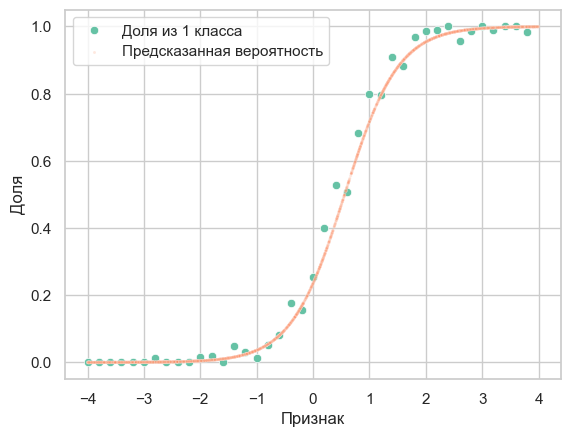

In [1885]:
sns.scatterplot(x=bins, y=data)
sns.scatterplot(x=X.flatten(), y=predict_prob_train[:, 1], size=1, marker='.', alpha=0.2)

plt.xlabel('Признак')
plt.ylabel('Доля')
plt.legend(['Доля из 1 класса', 'Предсказанная вероятность']);

Видно, что доля объектов в интервалах приблизительно равна предсказанной вероятности $\hat{p}(x)$. Это потому, что данные генерировались в соответствии с предположением о сигмоиде

Повторите проведенное исследование для следующих данных и сравните результаты.

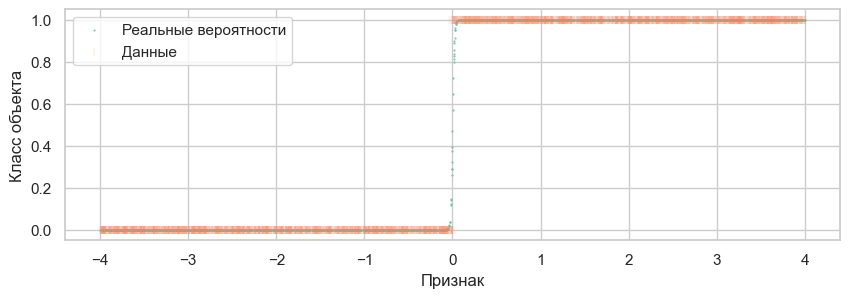

In [1886]:
# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

Обучаем модель и предсказываем вероятности:

In [1887]:
model = LogisticRegression(penalty=None)
model.fit(X, y)

predict_prob_train = model.predict_proba(X)

Готовим данные:

In [1888]:
bins = np.arange(-4, 4.0, 0.2)
indices = np.digitize(X, bins)

table_x = pd.DataFrame({'indices' : indices.flatten(), 'values' : X.flatten(), 'real': y})

data = (table_x[table_x['real'] == 1].groupby(by='indices').agg(['count']) / table_x.groupby(by='indices').agg(['count'])).fillna(0)
data = data[('values', 'count')]

Наносим на график:

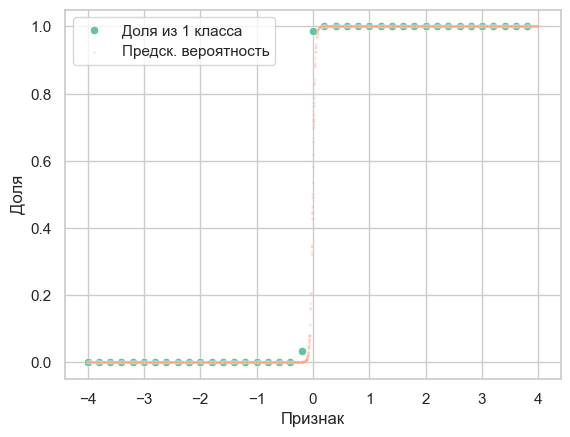

In [1889]:
sns.scatterplot(x=bins, y=data)
sns.scatterplot(x=X.flatten(), y=predict_prob_train[:, 1], size=1, marker='.', alpha=0.2)

plt.xlabel('Признак')
plt.ylabel('Доля')
plt.legend(['Доля из 1 класса', 'Предск. вероятность'], loc='upper left');

**Выводы:**

1. Из двух графиков видно, что доля объектов в интервалах достаточно близка к $\hat{p}(x)$. Это все потому, что наши данные в обоих случаях генерировались с предположением о сигмоиде. То есть мы на практике проверили, что это свойство выполняется
2. На втором графике в окрестности нуля точек не так много, в силу того, что сигмоида намного более резкая по сравнению с первым случаем и интервалы слишком большие, но в целом, в этом случае это свойство тоже работает

# ---

### Задача 4.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- f92a2876d3f2b0d01fc396776be023a9 -->
Продолжим исследовать модель логистической регрессии. Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [1890]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

,feature_1,feature_2,target
0,1,1,1
1,1,1,0
2,1,0,0
3,0,1,0
4,0,1,0


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 *различных* предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pd.pivot_table`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

In [1891]:
table = pd.pivot_table(data=data, index='feature_1', columns='feature_2', aggfunc='count')
table1 = pd.pivot_table(data=data[data['target'] == 1], index='feature_1', columns='feature_2', aggfunc='count')
table_new = table1/table 
table_new

target          
feature_2         0         1
feature_1                    
0          0.501781  0.483296
1          0.324503  0.620315

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 14e68d57d58f901b3350e63f76b9f8db -->
Обучите логистическую регрессию с `penalty='none'` и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее.

In [1892]:
model = LogisticRegression(penalty=None)
model.fit(data[['feature_1', 'feature_2']], data['target'])

predicted = model.predict_proba(data[['feature_1', 'feature_2']])[:, 1]
predicted = pd.Series(predicted, name='prob')
data = data.merge(predicted, left_index=True, right_index=True)
data.head(10)

,feature_1,feature_2,target,prob
0,1,1,1,0.519948
1,1,1,0,0.519948
2,1,0,0,0.406077
3,0,1,0,0.565616
4,0,1,0,0.565616
5,0,0,1,0.451143
6,0,0,1,0.451143
7,1,0,0,0.406077
8,0,0,0,0.451143
9,0,1,1,0.565616


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1b868a951c9dec0be47540d5316f7e9f -->
Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

Логистическая регрессия делает предположение о том, что вероятность принадлежности классу 1 равна $\mathbb{P}(y=1|x=x^{i}) = f(\theta^Tx)$, где: $$f(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}}$$

$\theta$ - вектор-столбец коэффициентов логистической регрессии, $x$ - произвольный вектор из обучающей выборки

Далее, для поиска параметров $\theta_1, ... \theta_n$ нам необходимо максимизировать следующий функционал:
$$L(\theta) = \prod_{i=1}^{n}\mathbb{P}(y = y^{i}|x=x^{i}) = \prod_{i=1}^{n}f(\theta^Tx)^y(1 - f(\theta^Tx))^{(1-y)}$$

А это эквивалентно максимизации следующей функции (в силу монотонного возрастания логарифма): $$\ln L(\theta) = \sum_{i=1}^{n} \ln \mathbb{P} \{ y = y^{(i)} \mid x = x^{(i)} \} =
\sum_{i=1}^{n} \left[ y^{(i)} \ln f(\theta^T x^{(i)}) + (1 - y^{(i)}) \ln (1 - f(\theta^T x^{(i)})) \right]
\quad$$


Что можно сделать с помощью градиентного спуска, откуда получим формулу:

$$\theta_{t+1} := \theta_{t} + \eta \nabla \ln L(\theta) = \theta_{t} + \eta \sum_{i=1}^{n} \left( y^{(i)} - f(\theta_t^T x^{(i)}) \right) x^{(i)}, \quad \eta > 0$$


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1180c36f8ac39574c944b19ddee07271 -->
Предложите и реализуйте способ построения модели логистической регрессии так, чтобы она точнее предсказывала частоты, посчитанные ранее.

Опишите ваше предложение:

Задача логистической регрессии - проведение оптимальной гиперплоскости. В этом случае этого сделать нельзя, поэтому необходимо взять новый признак $x_1x_2$, а затем только строить логистическую регрессию

Реализация:

Преобразуем данныe:

In [1893]:
copy = pd.DataFrame(data={'feature' : data['feature_1'] * data['feature_2'], 'target' : data['target']})

Получим предсказания:

In [1901]:
model = LogisticRegression()
model.fit(copy['feature'].ravel(), copy['target'].ravel())
predicted = model.predict

/var/folders/15/8_zty7w53r3ghl385nw5qlh80000gn/T/ipykernel_51628/3172747381.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(copy['feature'].ravel(), copy['target'].ravel())


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3f951c224a4ac471c658ed7755ff9521 -->
**Выводы:**

Порой необходимо предобработать данные, а только затем приступать к их анализу

Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.